## Part 1. Finance-datareader 활용.

코스피 지수와 코스피 구성종목 중 가장 비중 높은 4개 기업 데이터 불러오기¶
.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
!pip install Finance-datareader

In [3]:
import FinanceDataReader as fdr

In [ ]:
# 코스피 상장 기업 데이터 불러오기
df_kospi = fdr.StockListing('KOSPI')
df_kospi.head(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN
10,395750,KOSPI,ARIRANG ESG가치주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
11,395760,KOSPI,ARIRANG ESG성장주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
12,278420,KOSPI,ARIRANG ESG우수기업,NaN,NaN,NaT,NaN,NaN,NaN,NaN
13,292750,KOSPI,ARIRANG KRX300,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 1 to 8025
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6330 non-null   object        
 1   Market          6330 non-null   object        
 2   Name            6330 non-null   object        
 3   Sector          820 non-null    object        
 4   Industry        809 non-null    object        
 5   ListingDate     820 non-null    datetime64[ns]
 6   SettleMonth     820 non-null    object        
 7   Representative  820 non-null    object        
 8   HomePage        790 non-null    object        
 9   Region          820 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 544.0+ KB


In [ ]:
# 삼성전자, 엔솔, 하이닉스 Symbol 구하기
cond1 = df_kospi["Name"] == "삼성전자"
cond2 = df_kospi["Name"] == "LG에너지솔루션"
cond3 = df_kospi["Name"] == "SK하이닉스"
cond4 = df_kospi["Name"] == "삼성바이오로직스"
df_kospi[cond1 | cond2 | cond3 | cond4]
# Symbol - 삼성전자: 005930, LG에너지솔루션: 373220, SK하이닉스: 000660, 삼성바이오로직스: 207940

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1570,373220,KOSPI,LG에너지솔루션,일차전지 및 축전지 제조업,"2차전지 (소형,ESS,자동차전지)",2022-01-27,12월,권영수,NaN,서울특별시
1732,000660,KOSPI,SK하이닉스,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매",1996-12-26,12월,"박정호, 곽노정 (각자대표)",http://www.skhynix.com,경기도
4147,207940,KOSPI,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업,바이오의약품,2016-11-10,12월,임존종보 (Rim John Chongbo),http://www.samsungbiologics.com,인천광역시
4154,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"한종희, 경계현",http://www.sec.co.kr,경기도


In [ ]:
df = pd.DataFrame(columns=["Close", "Open", "High", "Low", "Volume", "Change"])

# KOSPI지수, 삼성전자, 엔솔, 하이닉스의 시계열 데이터 df 데이터프레임에 추가하기
symbols = ["KS11", "005930", "373220", "000660"]
names = ["KOSPI200", "Samsung Electronics", "LGensol", "SKhynix"]
for symbol, name in zip(symbols, names):
  dataset = fdr.DataReader(symbol, '2015-01-01')
  dataset["Name"] = name
  df = df.append(dataset)

df.head()

,Close,Open,High,Low,Volume,Change,Name
2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057,KOSPI200
2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055,KOSPI200
2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174,KOSPI200
2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007,KOSPI200
2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111,KOSPI200


In [ ]:
df.describe()

,Close,Open,High,Low,Volume,Change
count,5523.000000,5523.000000,5523.000000,5523.000000,5.523000e+03,5522.000000
mean,46984.348640,47007.366714,47596.068026,46357.818684,1.934997e+08,0.000494
std,57545.843619,57755.412825,58711.055468,56510.730327,3.324070e+08,0.017499
min,1457.640000,0.000000,0.000000,0.000000,0.000000e+00,-0.108911
25%,2486.225000,2486.645000,2495.425000,2475.830000,2.516330e+06,-0.008322
50%,42150.000000,42000.000000,42460.000000,41600.000000,8.093780e+06,0.000400
75%,71400.000000,71650.000000,72450.000000,70700.000000,3.443250e+08,0.008600
max,548000.000000,597000.000000,598000.000000,524000.000000,3.460000e+09,0.134006


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5523 entries, 2015-01-02 to 2022-05-19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5523 non-null   float64
 1   Open    5523 non-null   float64
 2   High    5523 non-null   float64
 3   Low     5523 non-null   float64
 4   Volume  5523 non-null   float64
 5   Change  5522 non-null   float64
 6   Name    5523 non-null   object 
dtypes: float64(6), object(1)
memory usage: 345.2+ KB


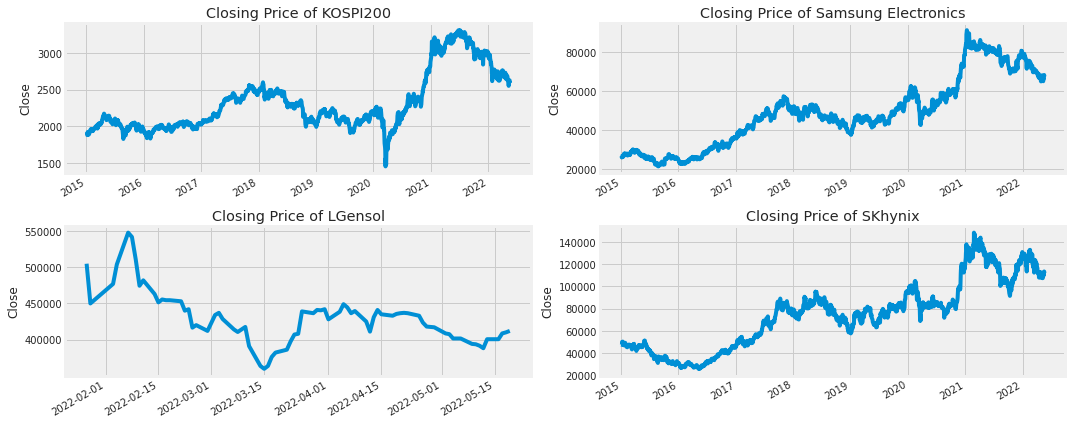

In [ ]:
# KOSPI지수를 비롯한 각 주식의 종가 데이터 그래프로 그리기
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, name in enumerate(names):
  plt.subplot(2, 2, i+1)
  each_df = df[df.Name == name]
  each_df["Close"].plot()
  plt.ylabel('Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {name}")

plt.tight_layout()

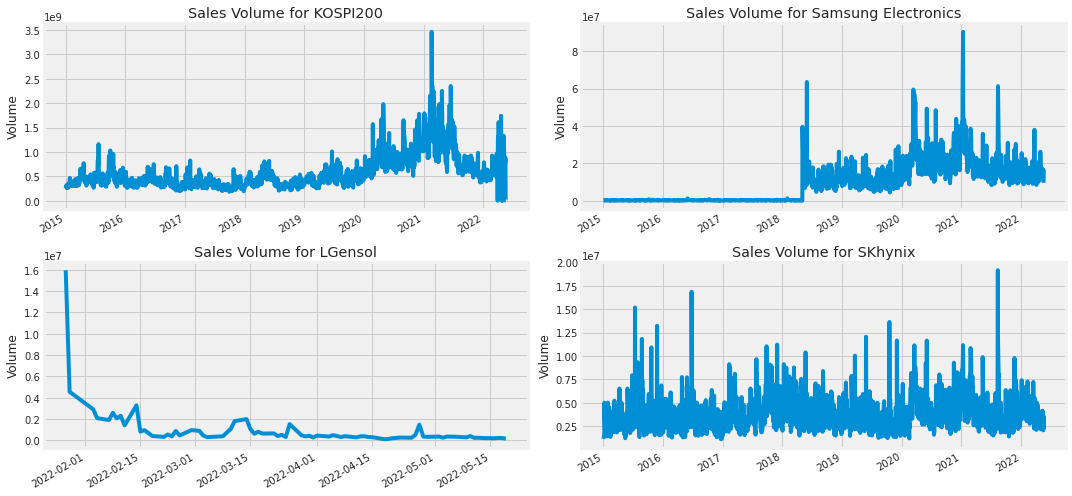

In [ ]:
# KOSPI지수를 비롯한 각 주식의 Volume 데이터 그래프로 그리기
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, name in enumerate(names):
    plt.subplot(2, 2, i+1)
    each_df = df[df.Name == name]
    each_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}")
    
plt.tight_layout()

### Part 2. KOSPI지수와 각 주식들의 10일, 20일, 50일 이동평균 구하기 

In [ ]:
ma_day = [10, 20, 50]


# df에 이동평균 컬럼 추가
tmp_df = pd.DataFrame(columns=["Close", "Open", "High", "Low", "Volume", "Change", "Name"])
for name in names:
    each_df = df[df.Name == name]
    tmp_df = pd.concat([tmp_df,each_df], axis=0)

    each_closing_price = each_df.loc[:, "Close"]
    for ma in ma_day:
        added_column_name = f"MA for {ma} days"
        tmp_df[added_column_name] = each_closing_price.rolling(ma).mean() # rolling: 이동평균 구하는 메서드

df = tmp_df

In [ ]:
df.head(10)

,Close,Open,High,Low,Volume,Change,Name,MA for 10 days,MA for 20 days,MA for 50 days
2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057,KOSPI200,NaN,NaN,NaN
2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055,KOSPI200,NaN,NaN,NaN
2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174,KOSPI200,NaN,NaN,NaN
2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007,KOSPI200,NaN,NaN,NaN
2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111,KOSPI200,NaN,NaN,NaN
2015-01-09,1924.70,1919.80,1929.10,1915.85,308780000.0,0.0105,KOSPI200,NaN,NaN,NaN
2015-01-12,1920.95,1918.18,1924.66,1917.88,311920000.0,-0.0019,KOSPI200,NaN,NaN,NaN
2015-01-13,1917.14,1915.03,1920.77,1910.27,338990000.0,-0.0020,KOSPI200,NaN,NaN,NaN
2015-01-14,1913.66,1919.31,1925.68,1913.51,297520000.0,-0.0018,KOSPI200,NaN,NaN,NaN
2015-01-15,1914.14,1914.06,1919.69,1908.60,266540000.0,0.0003,KOSPI200,48765.0,NaN,NaN


In [ ]:
df.tail(10)

,Close,Open,High,Low,Volume,Change,Name,MA for 10 days,MA for 20 days,MA for 50 days
2022-05-06,107500.0,108000.0,108500.0,106500.0,2566813.0,-0.018265,SKhynix,109750.0,110500.0,116280.0
2022-05-09,107500.0,107000.0,109000.0,106500.0,2203472.0,0.000000,SKhynix,109450.0,110275.0,115860.0
2022-05-10,110000.0,107000.0,111000.0,107000.0,4141923.0,0.023256,SKhynix,109650.0,110200.0,115610.0
2022-05-11,110500.0,110500.0,112500.0,108000.0,3658168.0,0.004545,SKhynix,109600.0,110175.0,115360.0
2022-05-12,109000.0,109500.0,111500.0,108500.0,4132948.0,-0.013575,SKhynix,109650.0,109975.0,115070.0
2022-05-13,112500.0,109000.0,112500.0,109000.0,4003349.0,0.032110,SKhynix,109950.0,110100.0,114820.0
2022-05-16,110500.0,113500.0,114000.0,110000.0,3930044.0,-0.017778,SKhynix,109750.0,110225.0,114450.0
2022-05-17,112500.0,111000.0,113000.0,110500.0,2056143.0,0.018100,SKhynix,109950.0,110400.0,114210.0
2022-05-18,113500.0,114000.0,115000.0,113000.0,3570113.0,0.008889,SKhynix,110300.0,110450.0,114090.0
2022-05-19,112000.0,110500.0,112000.0,110000.0,2226967.0,-0.013216,SKhynix,110550.0,110425.0,113970.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5523 entries, 2015-01-02 to 2022-05-19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           5523 non-null   float64
 1   Open            5523 non-null   float64
 2   High            5523 non-null   float64
 3   Low             5523 non-null   float64
 4   Volume          5523 non-null   float64
 5   Change          5522 non-null   float64
 6   Name            5523 non-null   object 
 7   MA for 10 days  5496 non-null   float64
 8   MA for 20 days  5466 non-null   float64
 9   MA for 50 days  5376 non-null   float64
dtypes: float64(9), object(1)
memory usage: 474.6+ KB


Text(0.5, 1.0, 'SK Biologics')

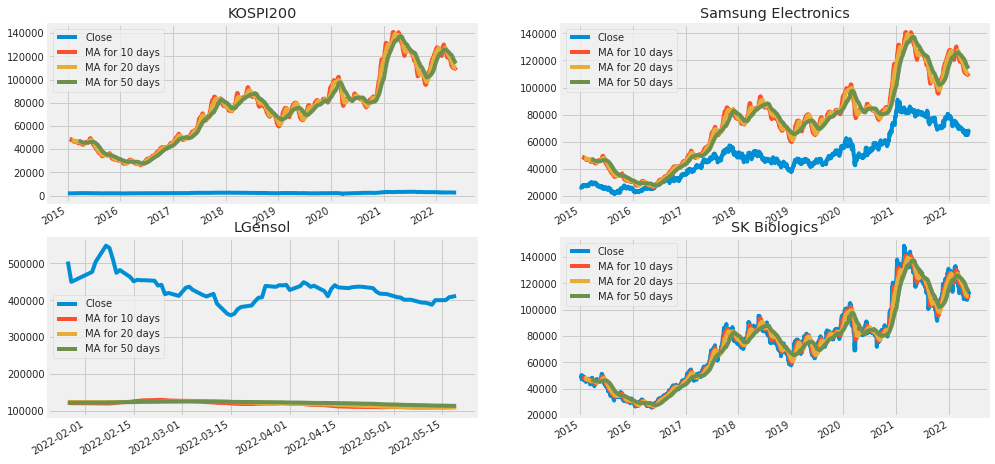

In [ ]:
# 이동평균 컬럼에 대한 그래프 보여주기

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

kospi = df[df.Name == "KOSPI200"]
samsung = df[df.Name == "Samsung Electronics"]
lg = df[df.Name == "LGensol"]
sk = df[df.Name == "SKhynix"]

kospi[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('KOSPI200')

samsung[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Samsung Electronics')

lg[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('LGensol')

sk[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('SK Biologics')

## Part 3. 지수와 주식의 daily 변화량 구하기

In [ ]:
tmp_df = pd.DataFrame(columns=df.columns)
for name in names:
    each_df = df[df.Name == name]
    tmp_df = tmp_df.append(each_df)
    tmp_df["Daily Return"] = each_df.Close.pct_change() # pct_change: 로우간 변화율 구하는 메서드
df = tmp_df

In [ ]:
df.head(10)

,Close,Open,High,Low,Volume,Change,Name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057,KOSPI200,NaN,NaN,NaN,NaN
2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055,KOSPI200,NaN,NaN,NaN,-0.002094
2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174,KOSPI200,NaN,NaN,NaN,-0.003148
2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007,KOSPI200,NaN,NaN,NaN,-0.002105
2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111,KOSPI200,NaN,NaN,NaN,0.053797
2015-01-09,1924.70,1919.80,1929.10,1915.85,308780000.0,0.0105,KOSPI200,NaN,NaN,NaN,-0.005005
2015-01-12,1920.95,1918.18,1924.66,1917.88,311920000.0,-0.0019,KOSPI200,NaN,NaN,NaN,0.012072
2015-01-13,1917.14,1915.03,1920.77,1910.27,338990000.0,-0.0020,KOSPI200,NaN,NaN,NaN,-0.025845
2015-01-14,1913.66,1919.31,1925.68,1913.51,297520000.0,-0.0018,KOSPI200,NaN,NaN,NaN,-0.002041
2015-01-15,1914.14,1914.06,1919.69,1908.60,266540000.0,0.0003,KOSPI200,48765.0,NaN,NaN,0.012270


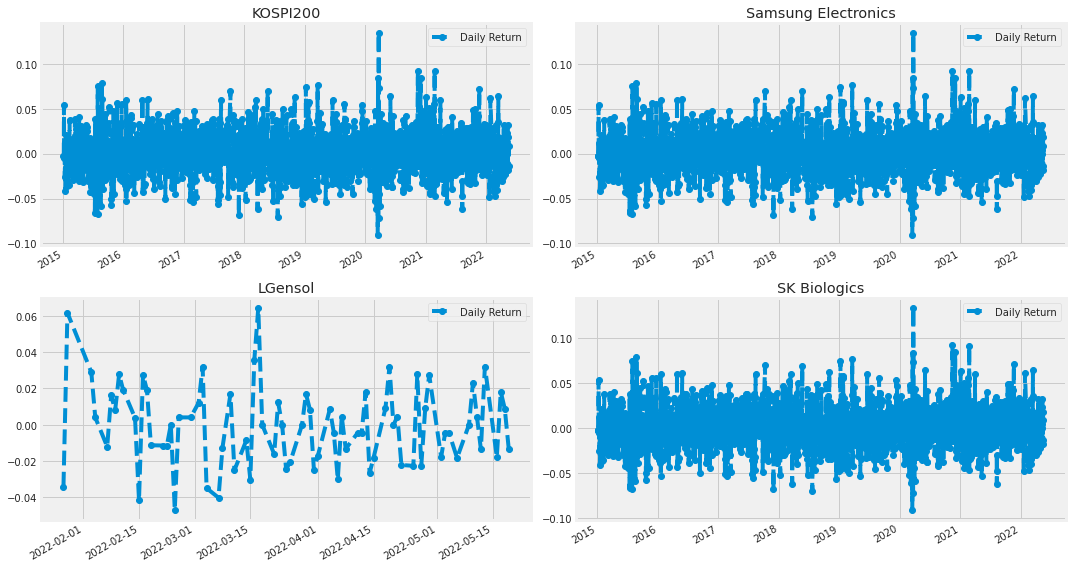

In [ ]:
# daily return percentage 시각화하기
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


kospi = df[df.Name == "KOSPI200"]
samsung = df[df.Name == "Samsung Electronics"]
lg = df[df.Name == "LGensol"]
sk = df[df.Name == "SKhynix"]

kospi['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('KOSPI200')

samsung['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Samsung Electronics')

lg['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('LGensol')

sk['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('SK Biologics')

fig.tight_layout()

['KOSPI200', 'Samsung Electronics', 'LGensol', 'SKhynix']


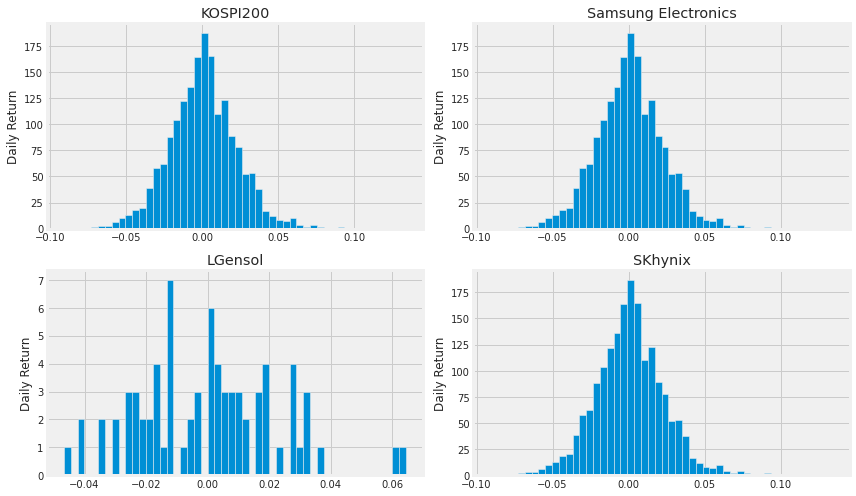

In [ ]:
plt.figure(figsize=(12, 7))
print(names)
for i, name in enumerate(names):
    plt.subplot(2, 2, i+1)
    each_df = df[df.Name == name]
    each_df['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{name}')
  
plt.tight_layout()

## Part 4. KOSPI지수와 각 주식들의 종가 들의 상관관계 파악하기¶

--> KOSPI 구성종목들 중 가장 비중이 큰 삼성전자와 KOSPI 지수와의 상관계수가 가장 크다는 점을 확인하고 싶었음

In [ ]:
# Grab all the closing prices for the stock list into one DataFrame
symbols = ["KS11", "005930", "373220", "000660"]
names = ["KOSPI200", "Samsung Electronics", "LGensol", "SKhynix"]

df_list = [fdr.DataReader(symbol, '2015-01-01')['Close'] for symbol, name in zip(symbols, names)]

In [ ]:
closing_df = pd.concat(df_list, axis=1)
closing_df.columns = [name for name in names]
closing_df.head()

,KOSPI200,Samsung Electronics,LGensol,SKhynix
Date,,,,
2015-01-02,1926.44,26600,NaN,47750
2015-01-05,1915.75,26660,NaN,47650
2015-01-06,1882.45,25900,NaN,47500
2015-01-07,1883.83,26140,NaN,47400
2015-01-08,1904.65,26280,NaN,49950


In [ ]:
daily_ret_rate = closing_df.pct_change()
daily_ret_rate.head()

,KOSPI200,Samsung Electronics,LGensol,SKhynix
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.005549,0.002256,NaN,-0.002094
2015-01-06,-0.017382,-0.028507,NaN,-0.003148
2015-01-07,0.000733,0.009266,NaN,-0.002105
2015-01-08,0.011052,0.005356,NaN,0.053797


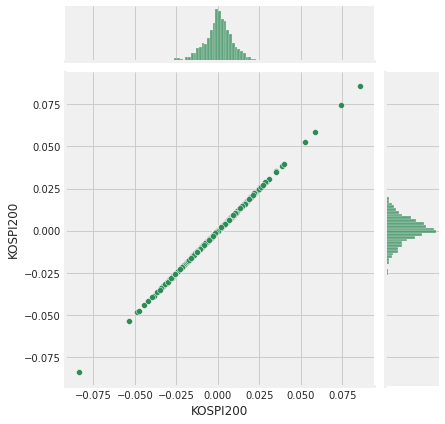

In [ ]:
sns.jointplot(x='KOSPI200', y='KOSPI200', data=daily_ret_rate, kind='scatter', color='seagreen')

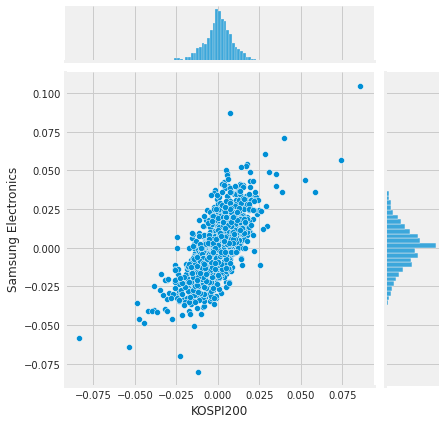

In [ ]:
sns.jointplot(x='KOSPI200', y='Samsung Electronics', data=daily_ret_rate, kind='scatter')

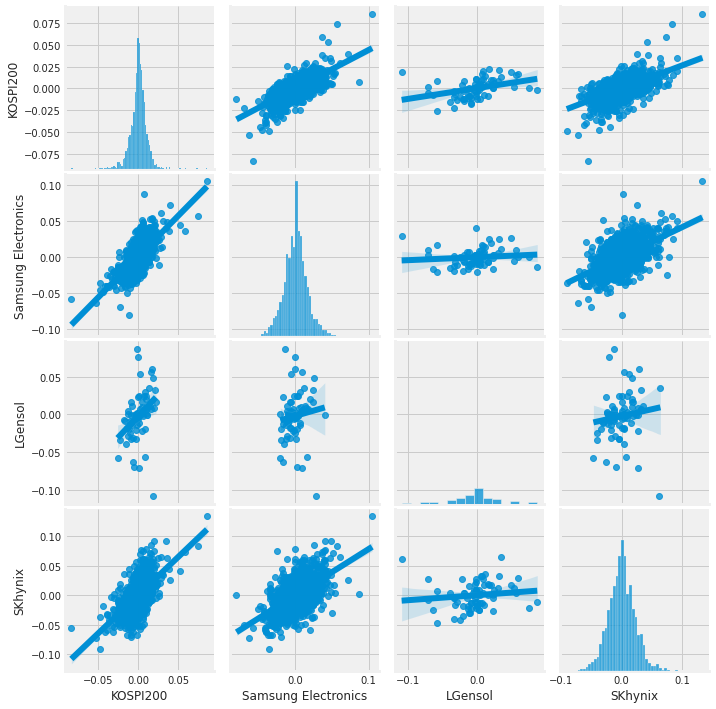

In [ ]:
sns.pairplot(daily_ret_rate, kind='reg')

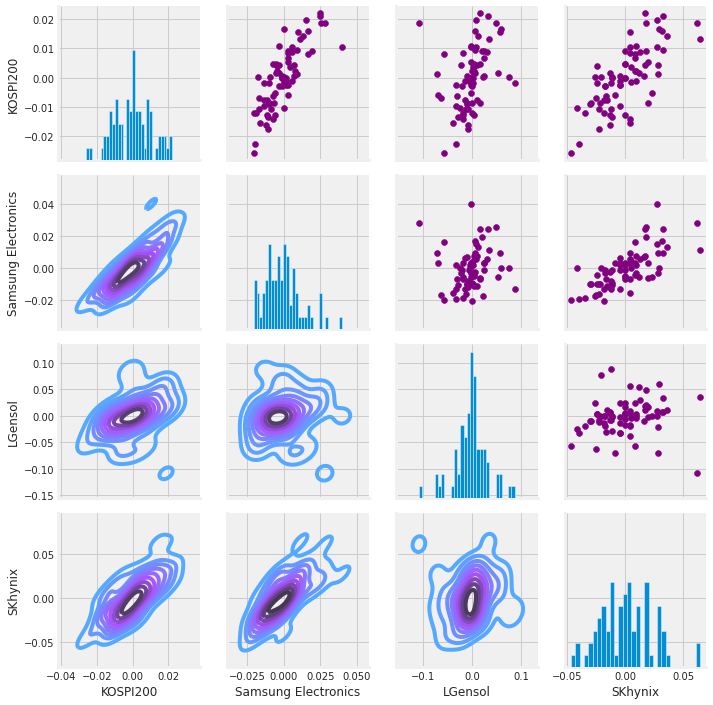

In [ ]:
# Set up our figure by naming it daily_ret_rate_fig, call PairPLot on the DataFrame
daily_ret_rate_fig = sns.PairGrid(daily_ret_rate.dropna())

# Using map_upper we can specify what the upper triangle will look like.
daily_ret_rate_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
daily_ret_rate_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily daily_ret_rate
daily_ret_rate_fig.map_diag(plt.hist, bins=30)

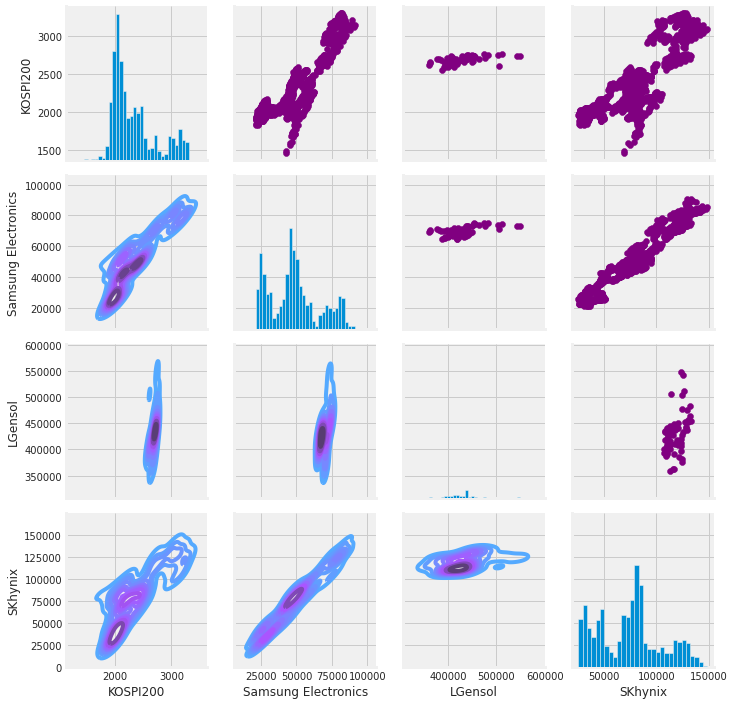

In [ ]:
# Set up our figure by naming it closing_fig, call PairPLot on the DataFrame
closing_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
closing_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
closing_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
closing_fig.map_diag(plt.hist,bins=30)

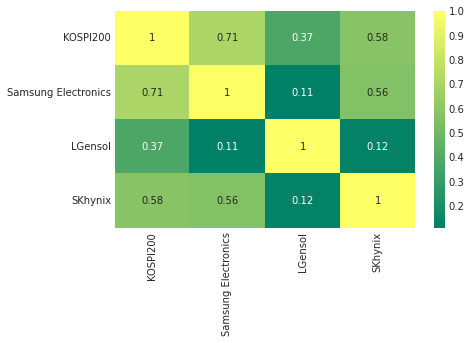

In [ ]:
# daily 수익률 기준으로 확인한 상관관계 매트릭스
sns.heatmap(daily_ret_rate.corr(), annot=True, cmap='summer')

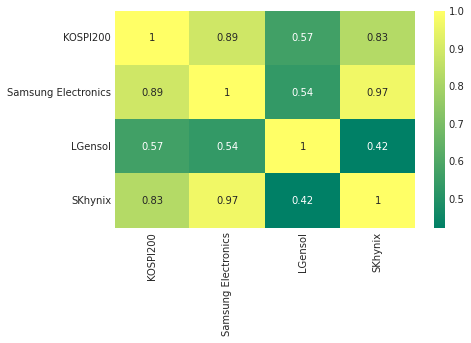

In [ ]:
# 종가 기준으로 확인한 상관관계 매트릭스
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## Part 5. LSTM 모델을 통해 삼성전자 종가, KOSPI 지수 예측

- 종가를 기준으로 LSTM 모델을 활용해 삼성전자 '종가' 자체를 예측!! 상승, 답보, 하락 예측이 아님
- MinMaxScaler 사용해서 Scaling 전처리
- Cross-validation 과정이 추가되어도 좋을 듯
- 한계점
    1. 감성지표를 활용하기 전 모델 적용이라 하더라도 피쳐 사용이 너무 없다.
        - 이동평균이나 지수평활법 같이 금융데이터 시계열 분석에서 활용하는 피쳐들이 있다고 하기는 하는데 추가적으로 찾아봐야 할 듯
        - 시계열 데이터셋이기 때문에 재무제표 내용을 피쳐로 추가하기에는 어려움이 있어 보임
    2. 가격 자체가 결과값으로 나오기 때문에 Precision, Recall, F score를 어떻게 도출해야 할 지 모르겠다<br>
    개인적으로 Confusion Matrix를 마지막에 보여주고 싶음

## 1. 독립변수 개념 정리

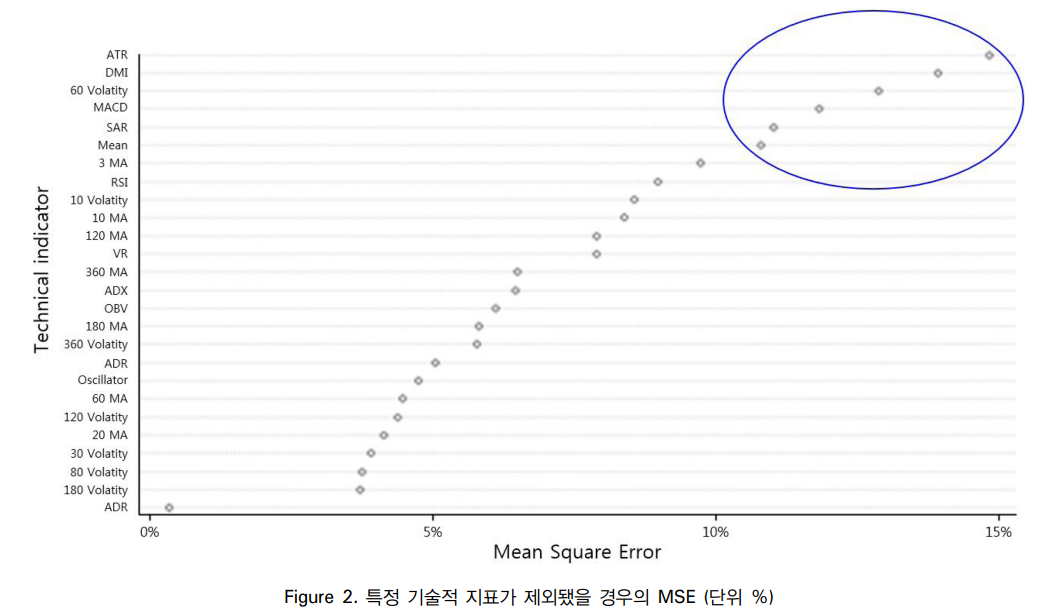

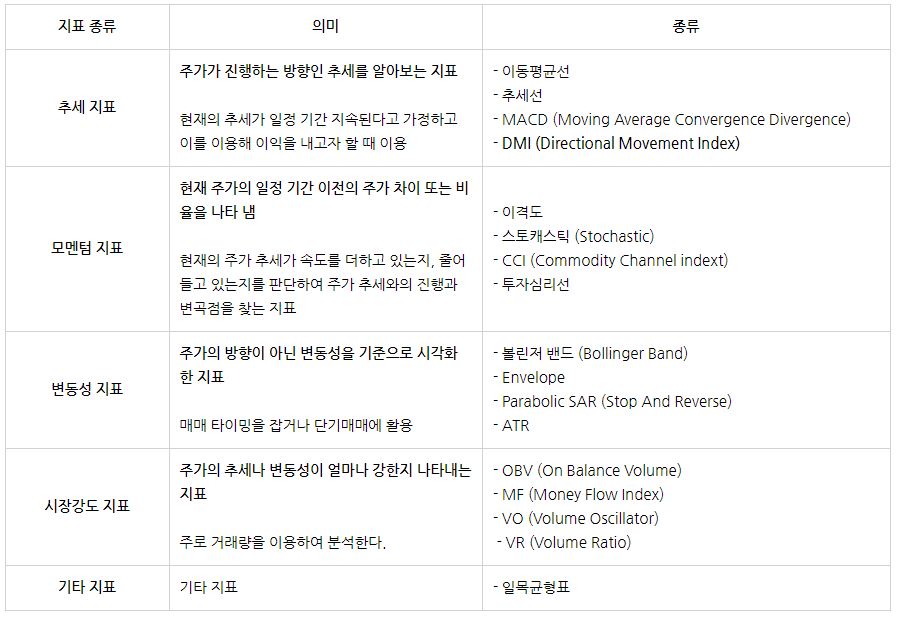

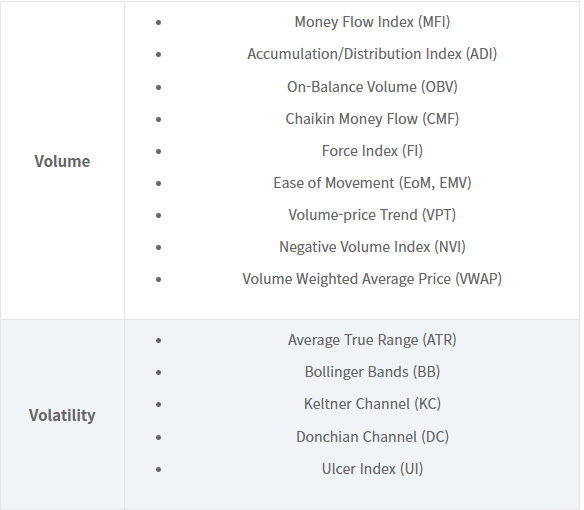

<br>

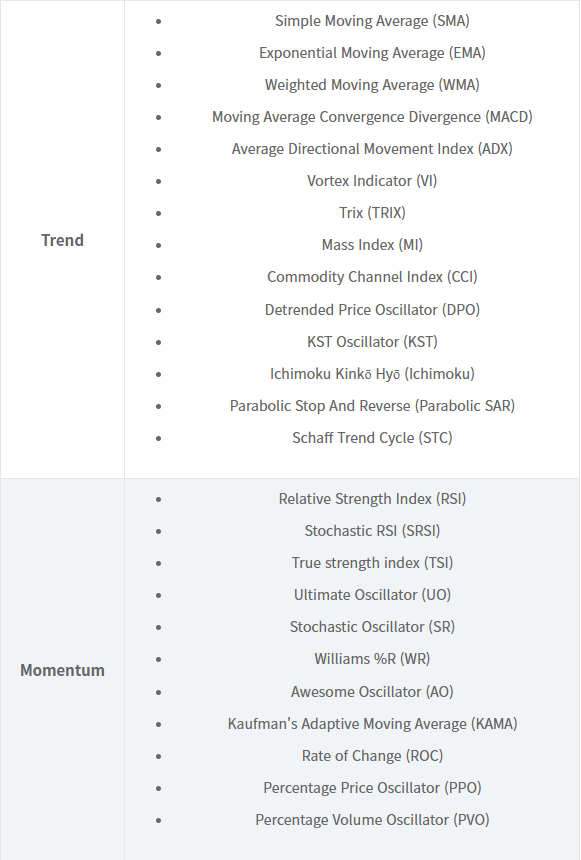

<br>

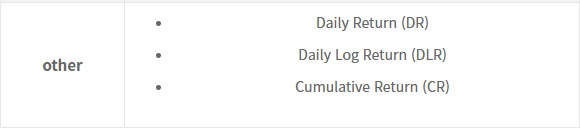

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [5]:
!pip install Finance-datareader
!pip install ta

In [1]:
import ta
import FinanceDataReader as fdr

In [47]:
# s: 삼성전자에 대한 데이터프레임
s = fdr.DataReader('323410', '2017-06-01')
s.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN
2021-08-09,69800,89100,69000,78500,44833696,0.124642
2021-08-10,81800,85600,68000,71400,26495122,-0.090446
2021-08-11,71200,77500,68100,74400,21592734,0.042017
2021-08-12,73600,75400,72700,73800,5878196,-0.008065


In [48]:
s.insert(6, "Rn", s.Close / s.Close.shift(1))
s.head()

,Open,High,Low,Close,Volume,Change,Rn
Date,,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN,NaN
2021-08-09,69800,89100,69000,78500,44833696,0.124642,1.124642
2021-08-10,81800,85600,68000,71400,26495122,-0.090446,0.909554
2021-08-11,71200,77500,68100,74400,21592734,0.042017,1.042017
2021-08-12,73600,75400,72700,73800,5878196,-0.008065,0.991935


In [49]:
s["MRn"] = s.Rn.rolling(3).mean()
s.head(10)

,Open,High,Low,Close,Volume,Change,Rn,MRn
Date,,,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN,NaN,NaN
2021-08-09,69800,89100,69000,78500,44833696,0.124642,1.124642,NaN
2021-08-10,81800,85600,68000,71400,26495122,-0.090446,0.909554,NaN
2021-08-11,71200,77500,68100,74400,21592734,0.042017,1.042017,1.025404
2021-08-12,73600,75400,72700,73800,5878196,-0.008065,0.991935,0.981169
2021-08-13,73500,78600,73500,76600,10907993,0.037940,1.037940,1.023964
2021-08-17,78100,88300,77500,87400,24272931,0.140992,1.140992,1.056956
2021-08-18,89600,94400,83800,84500,21008684,-0.033181,0.966819,1.048584
2021-08-19,87300,92300,86400,92000,13606690,0.088757,1.088757,1.065523


In [50]:
def get_volatility(rn, mrn, vol_day):
    l = len(rn)
    result = [np.nan for _ in range(l)]
    for i in range(l - 1, -1, -1):
        std = 0
        tmp_list = rn[i+1-vol_day:i+1]
        # print(tmp_list)
        for v in tmp_list:
            std += (v - mrn[i]) ** 2
        std = std ** (1/2)
        result[i] = std
    return result

rn = np.log(s.Close / s.Close.shift(1))
# print(get_volatility([1, 2, 3, 4, 5], [np.nan, np.nan, 2, 3, 4], 3))
for vol_day in [10,30,60,80,120,180,360]:
    rn_series = pd.Series(rn)
    mrn = rn_series.rolling(vol_day).mean()
    volatility = get_volatility(rn, mrn, vol_day)
    added_column = f'Volatility{vol_day}'
    s[added_column] = volatility

In [51]:
s.tail()

,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,Volatility60,Volatility80,Volatility120,Volatility180,Volatility360
Date,,,,,,,,,,,,,,,
2022-06-03,40300,41300,40150,41150,1406396,0.032622,1.032622,0.999068,0.057738,0.119250,0.166047,0.207365,0.260542,0.363960,NaN
2022-06-07,41100,41900,40700,41500,1678530,0.008505,1.008505,1.007149,0.050586,0.119790,0.166315,0.200545,0.260813,0.364087,NaN
2022-06-08,41500,41500,39600,40400,2070212,-0.026506,0.973494,1.004874,0.058430,0.118456,0.167044,0.201998,0.257714,0.364857,NaN
2022-06-09,40200,42300,39950,41050,6994591,0.016089,1.016089,0.999363,0.057289,0.117168,0.166767,0.200253,0.258317,0.363048,NaN
2022-06-10,40700,40750,39100,39150,2965288,-0.046285,0.953715,0.981099,0.072643,0.123824,0.162656,0.205101,0.261937,0.360546,NaN


In [52]:
ma_day = [3,10,20,60,120,180,360]
for ma in ma_day:
    added_column_name = f"MA{ma}"
    s[added_column_name] = s.Close.rolling(ma).mean() # rolling: 이동평균 구하는 메서드

In [53]:
s.head()

,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,...,Volatility120,Volatility180,Volatility360,MA3,MA10,MA20,MA60,MA120,MA180,MA360
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,69800,89100,69000,78500,44833696,0.124642,1.124642,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-10,81800,85600,68000,71400,26495122,-0.090446,0.909554,NaN,0.0,0.0,...,0.0,0.0,NaN,73233.333333,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-11,71200,77500,68100,74400,21592734,0.042017,1.042017,1.025404,0.0,0.0,...,0.0,0.0,NaN,74766.666667,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-12,73600,75400,72700,73800,5878196,-0.008065,0.991935,0.981169,0.0,0.0,...,0.0,0.0,NaN,73200.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# ATR 객체 만들고 시리즈 생성
ATR = ta.volatility.AverageTrueRange(high=s.High, low=s.Low, close=s.Close, window=14)
atr = ATR.average_true_range()

In [55]:
# MACD 객체 만들고 관련 시리즈 모두 생성 - 어떤 시리즈를 열에 추가할지는 정해야 함
MACD = ta.trend.MACD(close=s.Close)
macd_line = MACD.macd()
macd_hist = MACD.macd_diff()
macd_sign = MACD.macd_signal()

In [56]:
# PSAR 객체 만들고 관련 시리즈 모두 생성 - 어떤 시리즈를 열에 추가할지는 정해야 함  
PSAR = ta.trend.PSARIndicator(s.High, s.Low, s.Close)
psar = PSAR.psar()
psar_down = PSAR.psar_down()
psar_down_indicator = PSAR.psar_down_indicator()
psar_up = PSAR.psar_up()
psar_up_indicator = PSAR.psar_up_indicator()

In [57]:
# RSI(Relative Strength Index) 시리즈 생성
rsi = ta.momentum.rsi(s.Close)

In [58]:
# ADX(Average Directional Movement Index) 시리즈 생성
adx = ta.trend.adx(s.High, s.Low, s.Close)

C:\Users\user\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\user\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [59]:
# OBV(On-balance volume) 시리즈 생성
obv = ta.volume.on_balance_volume(s.Close, s.Volume)

In [60]:
# Oscillator 시리즈 생성
oscillator = ta.momentum.awesome_oscillator(s.High, s.Low)

In [61]:
# 지금까지 생성한 시리즈 컬럼에 추가
s["ATR"] = atr
s["MACD-line"] = macd_line
s["MACD-hist"] = macd_hist
s["MACD-sign"] = macd_sign
s["PSAR"] = psar
s["PSAR-down"] = psar_down
s["PSAR-up"] = psar_up
s["RSI"] = rsi
s["ADX"] = adx
s["OBV"] = obv
s["OSCILLATOR"] = oscillator

In [62]:
s.head()

,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,...,MACD-line,MACD-hist,MACD-sign,PSAR,PSAR-down,PSAR-up,RSI,ADX,OBV,OSCILLATOR
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,69800.0,NaN,NaN,NaN,0.0,59402373,NaN
2021-08-09,69800,89100,69000,78500,44833696,0.124642,1.124642,NaN,0.0,0.0,...,NaN,NaN,NaN,78500.0,NaN,NaN,NaN,0.0,104236069,NaN
2021-08-10,81800,85600,68000,71400,26495122,-0.090446,0.909554,NaN,0.0,0.0,...,NaN,NaN,NaN,69800.0,69800.0,NaN,NaN,0.0,77740947,NaN
2021-08-11,71200,77500,68100,74400,21592734,0.042017,1.042017,1.025404,0.0,0.0,...,NaN,NaN,NaN,68000.0,NaN,68000.0,NaN,0.0,99333681,NaN
2021-08-12,73600,75400,72700,73800,5878196,-0.008065,0.991935,0.981169,0.0,0.0,...,NaN,NaN,NaN,68000.0,NaN,68000.0,NaN,0.0,93455485,NaN


In [63]:
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2021-08-06 to 2022-06-10
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           206 non-null    int64  
 1   High           206 non-null    int64  
 2   Low            206 non-null    int64  
 3   Close          206 non-null    int64  
 4   Volume         206 non-null    int64  
 5   Change         205 non-null    float64
 6   Rn             205 non-null    float64
 7   MRn            203 non-null    float64
 8   Volatility10   205 non-null    float64
 9   Volatility30   205 non-null    float64
 10  Volatility60   205 non-null    float64
 11  Volatility80   205 non-null    float64
 12  Volatility120  205 non-null    float64
 13  Volatility180  205 non-null    float64
 14  Volatility360  0 non-null      float64
 15  MA3            204 non-null    float64
 16  MA10           197 non-null    float64
 17  MA20           187 non-null    floa

In [64]:
from datetime import datetime

s["negative"] = 0.0
s["neutral"] = 0.0
s["positive"] = 0.0
s["sentiment"] = "null"

filename = "./kakaobank_cleaned_combined_dataset_finBERT2.xlsx"
Fb_dataset = pd.read_excel(filename)
Fb_dataset["date"] = pd.to_datetime(Fb_dataset["date"], format='%Y%m%d')

for i in range(len(s)) : 
    for j in range(len(Fb_dataset)) :
        if(s.index[i] == Fb_dataset['date'][j]) :
            s["negative"][i] = Fb_dataset['negative'][j]
            s["neutral"][i] = Fb_dataset['neutral'][j]
            s["positive"][i] = Fb_dataset['positive'][j]
            s["sentiment"][i] = Fb_dataset['sentiment_to_num'][j]

s

C:\Users\user\AppData\Local\Temp/ipykernel_10564/1027550578.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["negative"][i] = Fb_dataset['negative'][j]
C:\Users\user\AppData\Local\Temp/ipykernel_10564/1027550578.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["neutral"][i] = Fb_dataset['neutral'][j]
C:\Users\user\AppData\Local\Temp/ipykernel_10564/1027550578.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["positive"

,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,...,PSAR-down,PSAR-up,RSI,ADX,OBV,OSCILLATOR,negative,neutral,positive,sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,59402373,NaN,0.000035,0.000444,0.999521,1
2021-08-09,69800,89100,69000,78500,44833696,0.124642,1.124642,NaN,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,104236069,NaN,0.484248,0.510137,0.005615,0
2021-08-10,81800,85600,68000,71400,26495122,-0.090446,0.909554,NaN,0.000000,0.000000,...,69800.0,NaN,NaN,0.000000,77740947,NaN,0.021416,0.971348,0.007236,0
2021-08-11,71200,77500,68100,74400,21592734,0.042017,1.042017,1.025404,0.000000,0.000000,...,NaN,68000.0,NaN,0.000000,99333681,NaN,0.000035,0.999906,0.000059,0
2021-08-12,73600,75400,72700,73800,5878196,-0.008065,0.991935,0.981169,0.000000,0.000000,...,NaN,68000.0,NaN,0.000000,93455485,NaN,0.000535,0.977616,0.021849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,40300,41300,40150,41150,1406396,0.032622,1.032622,0.999068,0.057738,0.119250,...,41711.0,NaN,49.614437,25.406637,31055414,-652.647059,0.000000,0.000000,0.000000,null
2022-06-07,41100,41900,40700,41500,1678530,0.008505,1.008505,1.007149,0.050586,0.119790,...,NaN,39800.0,51.412222,23.818792,32733944,-433.529412,0.000393,0.999096,0.000511,0
2022-06-08,41500,41500,39600,40400,2070212,-0.026506,0.973494,1.004874,0.058430,0.118456,...,41900.0,NaN,45.872439,22.798673,30663732,-430.735294,0.000041,0.999912,0.000047,0


In [65]:
s.to_excel("./kakaobank_stock_dataset_finBERT.xlsx")

##### 결측치 채우기 1) 단계적으로 채우기 

In [66]:
# 2 = avg(1, 5), 3 = avg(2, 5), 4 = avg(3, 5) 
for i in range(len(s)) : 
    prev_val = {"negVal" : 0.0, "neuVal" : 0.0, "posVal" : 0.0}
    next_val = {"negVal" : 0.0, "neuVal" : 0.0, "posVal" : 0.0}
    avg_val = {"negVal" : 0.0, "neuVal" : 0.0, "posVal" : 0.0}
    if(s['sentiment'][i] == "null") :
        prev_val = {"negVal" : s['negative'][i-1], "neuVal" : s["neutral"][i-1], "posVal" : s["positive"][i-1]}
        for j in range(i, len(s)) :
            if s['sentiment'][j] != "null" :
                next_val = {"negVal" : s['negative'][j], "neuVal" : s["neutral"][j], "posVal" : s["positive"][j]}
                break
        avg_val['negVal'] = (prev_val['negVal']+next_val['negVal'])/2
        avg_val['neuVal'] = (prev_val['neuVal']+next_val['neuVal'])/2
        avg_val['posVal'] = (prev_val['posVal']+next_val['posVal'])/2
        s['negative'][i] = avg_val['negVal']
        s['neutral'][i] = avg_val['neuVal']
        s['positive'][i] = avg_val['posVal']
        s['sentiment'][i] = max(avg_val, key=avg_val.get)
for i in range(len(s)) :
    if(s['sentiment'][i] == "negVal") : s['sentiment'][i] = -1
    elif(s['sentiment'][i] == "neuVal") : s['sentiment'][i] = 0
    elif(s['sentiment'][i] == "posVal") : s['sentiment'][i] = 1

C:\Users\user\AppData\Local\Temp/ipykernel_10564/3958940552.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['negative'][i] = avg_val['negVal']
C:\Users\user\AppData\Local\Temp/ipykernel_10564/3958940552.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['neutral'][i] = avg_val['neuVal']
C:\Users\user\AppData\Local\Temp/ipykernel_10564/3958940552.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['positive'][i] = avg_val[

In [67]:
s

,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,...,PSAR-down,PSAR-up,RSI,ADX,OBV,OSCILLATOR,negative,neutral,positive,sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-06,53700,69800,51000,69800,59402373,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,59402373,NaN,0.000035,0.000444,0.999521,1
2021-08-09,69800,89100,69000,78500,44833696,0.124642,1.124642,NaN,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,104236069,NaN,0.484248,0.510137,0.005615,0
2021-08-10,81800,85600,68000,71400,26495122,-0.090446,0.909554,NaN,0.000000,0.000000,...,69800.0,NaN,NaN,0.000000,77740947,NaN,0.021416,0.971348,0.007236,0
2021-08-11,71200,77500,68100,74400,21592734,0.042017,1.042017,1.025404,0.000000,0.000000,...,NaN,68000.0,NaN,0.000000,99333681,NaN,0.000035,0.999906,0.000059,0
2021-08-12,73600,75400,72700,73800,5878196,-0.008065,0.991935,0.981169,0.000000,0.000000,...,NaN,68000.0,NaN,0.000000,93455485,NaN,0.000535,0.977616,0.021849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,40300,41300,40150,41150,1406396,0.032622,1.032622,0.999068,0.057738,0.119250,...,41711.0,NaN,49.614437,25.406637,31055414,-652.647059,0.002548,0.883931,0.113520,0
2022-06-07,41100,41900,40700,41500,1678530,0.008505,1.008505,1.007149,0.050586,0.119790,...,NaN,39800.0,51.412222,23.818792,32733944,-433.529412,0.000393,0.999096,0.000511,0
2022-06-08,41500,41500,39600,40400,2070212,-0.026506,0.973494,1.004874,0.058430,0.118456,...,41900.0,NaN,45.872439,22.798673,30663732,-430.735294,0.000041,0.999912,0.000047,0


In [68]:
s.to_excel("./kakaobank_stock_dataset_finBERT_notnull.xlsx")

##### 결측치 해결 2) 같은 값으로 채우기 

In [255]:
# filename = "./stock_dataset_finBERT3.xlsx"
# s = pd.read_excel(filename)
# print(s)

null_start_idx = 0
null_end_idx = 0
for i in range(len(s)) : 
    prev_val = {"negVal" : 0.0, "neuVal" : 0.0, "posVal" : 0.0}
    next_val = {"negVal" : 0.0, "neuVal" : 0.0, "posVal" : 0.0}
    avg_val = {"negVal" : 0.0, "neuVal" : 0.0, "posVal" : 0.0}

    if s['sentiment'][i] == "null" :
        prev_val = {"negVal" : s['negative'][i-1], "neuVal" : s["neutral"][i-1], "posVal" : s["positive"][i-1]}
        null_start_idx = i
        for j in range(i, len(s)) :
            if s['sentiment'][j] != "null" :
                next_val = {"negVal" : s['negative'][j], "neuVal" : s["neutral"][j], "posVal" : s["positive"][j]}
                null_end_idx = j
                break
    avg_val['negVal'] = (prev_val['negVal']+next_val['negVal'])/2
    avg_val['neuVal'] = (prev_val['neuVal']+next_val['neuVal'])/2
    avg_val['posVal'] = (prev_val['posVal']+next_val['posVal'])/2
    print(avg_val)
    for j in range(null_start_idx, null_end_idx) :
        s['negative'][j] = avg_val['negVal']
        s['neutral'][j] = avg_val['neuVal']
        s['positive'][j] = avg_val['posVal']
        s['sentiment'][j] = max(avg_val, key=avg_val.get)
    i = null_end_idx    
#     i += 1
    
for i in range(len(s)) :
    if(s['sentiment'][i] == "negVal") : s['sentiment'][i] = -1
    elif(s['sentiment'][i] == "neuVal") : s['sentiment'][i] = 0
    elif(s['sentiment'][i] == "posVal") : s['sentiment'][i] = 1

{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'po

{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}
{'negVal': 0.0, 'neuVal': 0.0, 'posVal': 0.0}


In [256]:
s.head(10)

,Date,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,...,PSAR-down,PSAR-up,RSI,ADX,OBV,OSCILLATOR,negative,neutral,positive,sentiment
0,2017-06-01,44860,44900,44400,44680,195070,-0.000447,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,195070,NaN,0.003329,0.071755,0.924916,1.0
1,2017-06-02,45060,45960,45000,45960,249775,0.028648,1.028648,NaN,0.0,...,NaN,NaN,NaN,0.0,444845,NaN,0.011197,0.002902,0.985901,1.0
2,2017-06-05,46040,46360,45720,45940,151988,-0.000435,0.999565,NaN,0.0,...,44900.00000,NaN,NaN,0.0,292857,NaN,0.000000,0.000000,0.000000,NaN
3,2017-06-07,46500,46500,45240,45300,274588,-0.013931,0.986069,1.004761,0.0,...,NaN,45720.0,NaN,0.0,18269,NaN,0.000138,0.000351,0.999511,1.0
4,2017-06-08,45000,45580,45000,45160,279575,-0.003091,0.996909,0.994181,0.0,...,46500.00000,NaN,NaN,0.0,-261306,NaN,0.000037,0.000082,0.999881,1.0
5,2017-06-09,45680,46440,45600,46100,234657,0.020815,1.020815,1.001264,0.0,...,46500.00000,NaN,NaN,0.0,-26649,NaN,0.000041,0.000085,0.999874,1.0
6,2017-06-12,45420,45600,45140,45380,219086,-0.015618,0.984382,1.000702,0.0,...,46470.00000,NaN,NaN,0.0,-245735,NaN,0.001564,0.995416,0.003020,0.0
7,2017-06-13,45140,45620,45140,45400,172498,0.000441,1.000441,1.001879,0.0,...,46440.60000,NaN,NaN,0.0,-73237,NaN,0.000000,0.000000,0.000000,NaN
8,2017-06-14,45800,46060,45240,45360,203334,-0.000881,0.999119,0.994647,0.0,...,46411.78800,NaN,NaN,0.0,-276571,NaN,0.000000,0.000000,0.000000,NaN
9,2017-06-15,45680,45920,45180,45680,193140,0.007055,1.007055,1.002205,NaN,...,46383.55224,NaN,NaN,0.0,-83431,NaN,0.001151,0.013396,0.985453,1.0


In [ ]:
s.to_excel("./stock_dataset_finBERT_notnull2.xlsx")

## 2. 특정 키워드 크롤링
네이버 금융에서 특정 기업 관련 기사 자료 확인할 수 있도록 해둠.<BR>
https://finance.naver.com/item/news.naver?code=005930

In [ ]:
#이 부분은 처음 한번만 실행하면 됌.
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
 
# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
 
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()       # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.l

WebDriverException: ignored

In [ ]:
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/item/news.naver?code=005930'

In [ ]:
driver.get(url)
driver.implicitly_wait(10)
time.sleep(3)
html = driver.page_source
driver.implicitly_wait(10)

soup = BeautifulSoup(html, 'html.parser')
contents = soup.find_all('div', {"class": "tb_cont"})
print(contents)
# assert "Python" in driver.title
# elem = 

[]


In [ ]:

# from selenium.webdriver.common.by import By
# contents = driver.find_elements(By.CLASS_NAME, 'tb_cont')
# contents

contents = soup.find("div", {"class": "tb_cont"})
type(contents)

NoneType